# Model Selection

In [1]:
# Import packages

In [2]:
import numpy as np 
import pandas as pd 
import warnings
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

In [3]:
 # Algorithms
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression

In [4]:
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Searching
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [5]:
# Visualization
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [6]:
# Read Data set 
data =pd.read_csv("New_Dataset_Gender_Height_Weight_Age_Calories.csv")

In [7]:
x = data.iloc[:,:4]
y = data.iloc[:,4]

In [8]:
# Feature scalling
scaler= MinMaxScaler()
x=scaler.fit_transform(x)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=0,shuffle=True)

In [10]:
 # Models
gb=GradientBoostingRegressor()
xgb=XGBRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
lin=LinearRegression()
svr=SVR()


In [11]:
# Using Pipeline

In [12]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [14]:
pipeline_gb=Pipeline([('scalar1',StandardScaler()), ('pca1',PCA(n_components=4)), ('gb_classifier',gb)]);

pipeline_xgb=Pipeline([('scalar2',StandardScaler()), ('pca2',PCA(n_components=4)), ('xgb_classifier',xgb)]);

pipeline_dt=Pipeline([('scalar3',StandardScaler()), ('pca3',PCA(n_components=4)), ('dt_classifier',dt)]);

pipeline_rf=Pipeline([('scalar4',StandardScaler()), ('pca4',PCA(n_components=4)), ('rf_classifier',rf)]);

pipeline_lin=Pipeline([('scalar5',StandardScaler()), ('pca5',PCA(n_components=4)), ('lin_classifier',lin)]);

pipeline_svr=Pipeline([('scalar6',StandardScaler()), ('pca6',PCA(n_components=4)), ('svr_classifier',svr)]);



In [15]:
## LEts make the list of pipelines
pipelines =[pipeline_gb,pipeline_xgb,pipeline_dt,pipeline_rf,pipeline_lin,pipeline_svr] 

In [16]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [2]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'gb Moddel',1: 'xgb Model',2: 'dt Model',3: 'rf Moddel',4: 'lin Model',5: 'svr Model'}
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)



NameError: name 'pipelines' is not defined

In [18]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

gb Moddel Test Accuracy: 0.8528555847598895


AttributeError: dlsym(0x7f7ee30f2ac0, XGDMatrixSetStrFeatureInfo): symbol not found

In [29]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:rf Moddel


#############################################################################################################################

In [64]:
## Using Cross validation

In [40]:
# Classifier scores dict
scores_dict = {}


In [41]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = GradientBoostingRegressor()
clf2 = XGBRegressor()
clf3 = DecisionTreeRegressor()
clf4 = RandomForestRegressor()
clf5 = LinearRegression()
clf6 = SVR()



print('5-fold StratifiedKFold cross validation:\n')
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
# default cv used StratifiedKFold for int
labels = ['GradientBoostingRegressor', 'XGBRegressor', 'DecisionTreeRegressor','RandomForestRegressor','LinearRegression','SVR']


5-fold StratifiedKFold cross validation:



In [42]:
for i,(clf, label) in enumerate(zip([clf1, clf2, clf3,clf4,clf5, clf6], labels)):
    s= cross_val_score(clf,x,y, cv=5);
    results=np.average(s) ;
    print(label," : ",results)

GradientBoostingRegressor  :  0.6414981662959756
XGBRegressor  :  0.5414481339778263
DecisionTreeRegressor  :  0.4278261447488866
RandomForestRegressor  :  0.6031930463415567
LinearRegression  :  0.6050795446557475
SVR  :  0.3165114488589619


In [45]:
Models=['GB', 'XGB', 'Dt','Rf','Linear','SVR']

for i,(clf, label) in enumerate(zip([clf1, clf2, clf3,clf4,clf5, clf6], Models)):
    s= cross_val_score(clf,x,y, cv=5);
    results=np.average(s) ;
    scores_dict[Models[i]]= results
   

No handles with labels found to put in legend.


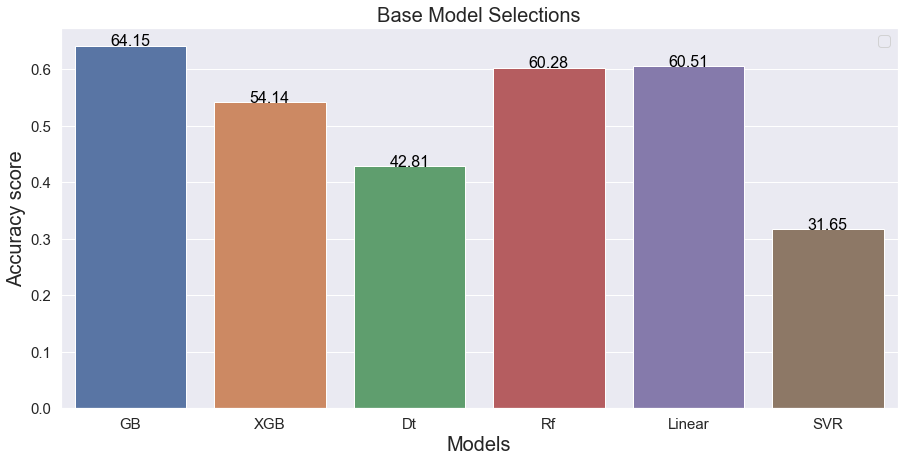

In [46]:
import seaborn as sns
labels= ['GB', 'XGB', 'Dt','Rf','Linear','SVR']
        
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scores = list(scores_dict.values())
  #sns.color_palette("Greens_d", len(dataset))
  # deep , light winter spring
  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Models",fontsize=20)
  plt.ylabel("Accuracy score",fontsize=20)
  plt.title("Base Model Selections",fontsize=20)
  plt.tick_params(labelsize=15)
  plt.legend(loc="best",fontsize=15),
  s=sns.barplot(x=algo_name,y=scores) 
  #legend(labels)
  for idx, val in enumerate(scores):
    s.text(idx,val, round(scores[idx]*100,2), color='black', ha="center",fontsize=16)
    
  plt.show()
